# Simple Analysis

For a single DR method/classifier.

In [1]:
import sys
path_scripts = '/home/noticed/supervised-DR-for-ASP/scripts/'
sys.path.append(path_scripts)

import IS_class as ip
from IS_class import InstanceSpace
import IS_eval as ipe
from proj_set import *

import pandas as pd
import numpy as np
import pickle as pkl

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
metadata = pd.read_csv('./metadata/tsp.csv', index_col=0)
outpath = './results/tsp_all/'
selFeats = [c for c in metadata.columns if c.startswith('feature_')]


In [3]:
selFeats

['feature_Mean_StdDevDist',
 'feature_Centroid_X',
 'feature_Centroid_Y',
 'feature_Radius',
 'feature_FracDistinctDists_1Digit',
 'feature_FracDistinctDists_2Digits',
 'feature_FracDistinctDists_3Digits',
 'feature_FracDistinctDists_4Digits',
 'feature_RectangularArea',
 'feature_VarNormalised_nNNds',
 'feature_CoeffvarNormalised_nNNds',
 'feature_NumClusters',
 'feature_CitiesModClusters',
 'feature_VarCitiesPerCluster',
 'feature_NumOutliers',
 'feature_RatioNodesNearEdgesPlane',
 'feature_MeanRadiusEachCluster']

In [4]:
iSpace = InstanceSpace()
iSpace.fromMetadata(metadata, scaler='s',best='Best',source='source')
iSpace.path = outpath
iSpace.dropFeatures(selFeats)

iSpace.splitData(test_size=0.2, random_state=1111,scale=True, stratified=True)
iSpace.PILOT(n_components=2,mode='a')

# if algo perf is very similar, rel PLS good
# iSpace.getRelativePerf(True)
# iSpace.PLS('rel',n_components=2)


Features dropped. Remaining features: 17


In [5]:
iSpace.projections.keys()

dict_keys(['PILOTa'])

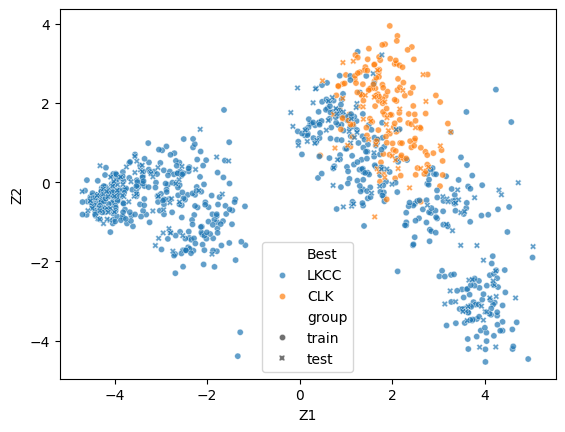

In [7]:
iSpace.plot(proj='PILOTa', hue='Best')
# plt.savefig('./Plots/tsp_pilot.png', dpi=300)
#

In [8]:
iSpace.PlotProj['PILOTa']

,Z1,Z2,Best,group
instances,,,,
random_025,1.298406,2.261761,LKCC,train
LKCChard_086,2.027440,1.388526,CLK,train
LKCCeasy_020,-1.392877,-0.432340,LKCC,train
LKCCeasy_028,-3.315731,-0.817372,LKCC,train
LKCChard_002,1.632807,2.368057,CLK,train
...,...,...,...,...
LKCChard_078,1.867692,1.459294,CLK,test
CLKeasy_161,-3.524094,-0.294463,LKCC,test
LKCChard_009,1.834268,2.024413,CLK,test


In [9]:
## original features
x_all = pd.DataFrame(pd.concat([iSpace.split_data['Yb_train'],iSpace.split_data['Yb_test']]))
x_all['group'] = ['train']*len(iSpace.split_data['Yb_train'])+['test']*len(iSpace.split_data['Yb_test'])

zcols = [f'Z{i+1}' for i in range(iSpace.m)]
x_all = pd.concat([
    pd.DataFrame(np.vstack([iSpace.split_data['X_train'],iSpace.split_data['X_test']]), columns=zcols, index=x_all.index),
    x_all], axis=1)
iSpace.addProj('All', x_all, 
            {'col_names':dict(zip(zcols,iSpace.featureNames))})


Manually adding All projection


In [10]:
## predictions -- using default params
is_pred = ipe.PredictionEval(iSpace.PlotProj, split=True)
proj = 'PILOTa'

is_pred.makePredictions_svm(proj, params={})
is_pred.makePredictions_svm('All', params={})

is_pred.makePredictions_avg(avg_algo=metadata['Best'].value_counts().idxmax())
    

In [11]:
# ## for SVM hyperparameter tuning and prediction
# metadata_train = metadata.loc[iSpace.split_data['Yb_train'].index]
# pred_paramDF = ipe.pred_cv_basic(metadata_train,selFeats,outpath,iSpace)
# is_pred.makePredictions_svm(proj, params=pred_paramDF.loc[proj,'SVM'])


In [12]:
is_pred.projections['All']

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,...,Z14,Z15,Z16,Z17,Best,group,pred_svm,prob_svm_CLK,prob_svm_LKCC,pred_avg
instances,,,,,,,,,,,,,,,,,,,,,
random_025,-1.329756,-0.011702,1.416425,-0.826864,0.708852,0.793736,0.809500,0.698951,-0.133483,0.605744,...,2.155943,0.889237,-0.288533,-0.486916,LKCC,train,LKCC,0.401351,0.598649,LKCC
LKCChard_086,-0.385256,-2.618853,-0.681497,-0.826861,0.882274,0.824097,0.757449,0.761733,-0.264730,0.310339,...,0.850307,0.166435,-0.000757,-0.655219,CLK,train,CLK,0.976470,0.023530,LKCC
LKCCeasy_020,-0.359731,-0.590759,-0.620860,1.132267,-1.183024,-1.193554,-1.201832,-1.202780,-1.932913,0.310391,...,-0.480249,1.467479,-0.576308,-0.799206,LKCC,train,LKCC,0.007007,0.992993,LKCC
LKCCeasy_028,0.681836,-1.714076,1.100691,1.273764,-1.167258,-1.193554,-1.202814,-1.202747,1.321271,-0.146623,...,-0.652395,-1.134609,0.747459,1.592998,LKCC,train,LKCC,0.021660,0.978340,LKCC
LKCChard_002,-0.397587,-1.707116,-1.915856,-0.826860,0.834977,0.981424,0.877265,0.746016,1.078403,1.094525,...,-0.652395,0.166435,-0.461198,0.994299,CLK,train,CLK,0.995997,0.004003,LKCC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LKCChard_078,0.133601,1.021137,1.445001,-0.826860,0.945336,0.920701,0.852712,0.811519,0.349800,0.131131,...,3.056814,-0.267247,0.171908,-0.310574,CLK,test,CLK,0.677910,0.322090,LKCC
CLKeasy_161,0.037730,-0.246248,-0.866198,1.198150,-1.214555,-1.210115,-1.197903,-1.202714,1.321271,-1.245799,...,2.326108,-1.134609,1.438120,0.165139,LKCC,test,LKCC,0.010671,0.989329,LKCC
LKCChard_009,-0.167103,-1.244287,0.727108,-0.826861,0.771914,1.025586,0.908692,0.702092,-1.087169,-0.896069,...,3.761870,-0.700928,-0.921639,-0.471034,CLK,test,CLK,0.747477,0.252523,LKCC


In [13]:
is_pred.projections['PILOTa']

,Z1,Z2,Best,group,pred_svm,prob_svm_CLK,prob_svm_LKCC
instances,,,,,,,
random_025,1.298406,2.261761,LKCC,train,CLK,8.043751e-01,0.195625
LKCChard_086,2.027440,1.388526,CLK,train,CLK,8.577667e-01,0.142233
LKCCeasy_020,-1.392877,-0.432340,LKCC,train,LKCC,3.384989e-07,1.000000
LKCCeasy_028,-3.315731,-0.817372,LKCC,train,LKCC,3.981779e-03,0.996018
LKCChard_002,1.632807,2.368057,CLK,train,CLK,9.391580e-01,0.060842
...,...,...,...,...,...,...,...
LKCChard_078,1.867692,1.459294,CLK,test,CLK,8.302266e-01,0.169773
CLKeasy_161,-3.524094,-0.294463,LKCC,test,LKCC,3.748129e-03,0.996252
LKCChard_009,1.834268,2.024413,CLK,test,CLK,9.395685e-01,0.060432


Same evaluation as before.

In [14]:
for proj in is_pred.projections.keys():
    is_pred.evaluate_predictions(proj)
    is_pred.calc_regrets(proj,iSpace.performance,min=True,tie_lab=None)


In [15]:
predEvalDF = pd.DataFrame.from_dict(is_pred.evals, orient='index').reset_index().rename(
        columns={'level_0':'proj', 'level_1':'pred_model','level_2':'group'}
    )

In [16]:
predEvalDF.query("group=='test'")

,proj,pred_model,group,accuracy,precision,precision_w,recall,recall_m,f1,f1_w
1,PILOTa,svm,test,0.878947,0.800000,0.872727,0.526316,0.746711,0.781183,0.868940
4,All,svm,test,0.921053,0.896552,0.919683,0.684211,0.832237,0.864098,0.916885
5,All,avg,test,0.800000,1.000000,0.840000,0.000000,0.500000,0.444444,0.711111


In [17]:
regretDF = pd.concat(is_pred.regrets).reset_index().rename(
        columns={'level_0':'proj', 'level_1':'pred_model','level_2':'group'}
    )

<Axes: xlabel='proj', ylabel='abs_reg'>

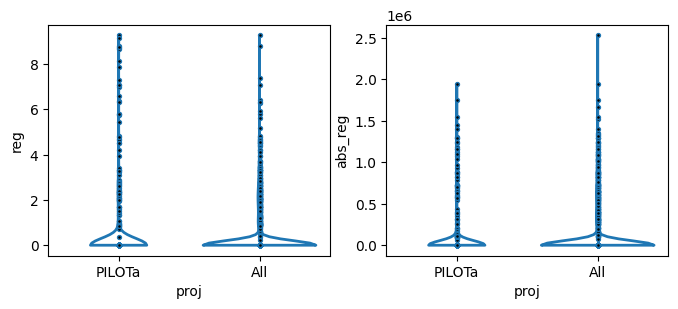

In [18]:
plt.subplots(1,2, figsize=(8,3))

plt.subplot(1,2,1)
sns.violinplot(
    data = regretDF, y='reg', x='proj',
    inner='point', 
    cut=0, density_norm='count',
    fill=False, linewidth=2,
    inner_kws={'s':8, 'color': 'black'}
)

plt.subplot(1,2,2)
sns.violinplot(
    data = regretDF, y='abs_reg', x='proj',
    inner='point', 
    cut=0, density_norm='count',
    fill=False, linewidth=2,
    inner_kws={'s':8, 'color': 'black'}
)

<Axes: xlabel='proj', ylabel='abs_reg_sub'>

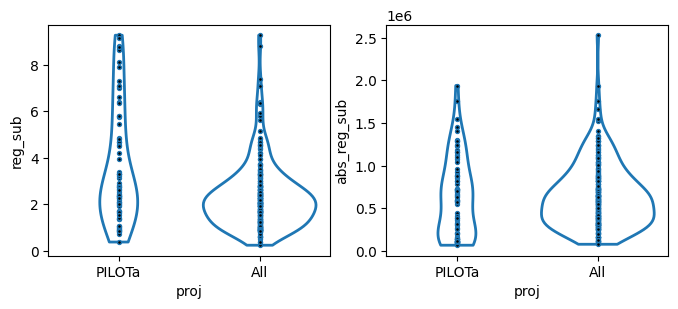

In [19]:
plt.subplots(1,2, figsize=(8,3))

plt.subplot(1,2,1)
sns.violinplot(
    data = regretDF, y='reg_sub', x='proj',
    inner='point', 
    cut=0, density_norm='count',
    fill=False, linewidth=2,
    inner_kws={'s':8, 'color': 'black'}
)

plt.subplot(1,2,2)
sns.violinplot(
    data = regretDF, y='abs_reg_sub', x='proj',
    inner='point', 
    cut=0, density_norm='count',
    fill=False, linewidth=2,
    inner_kws={'s':8, 'color': 'black'}
)